In [9]:
import pandas as pd
df = pd.read_csv("realestate.csv")
# print(df.head())
# print(df.shape)
print(df.columns)
# print(df.info())
# print(df.describe())



Index(['No', 'TransactionDate', 'HouseAge', 'DistanceToMRT',
       'NumberConvenienceStores', 'Latitude', 'Longitude', 'PriceOfUnitArea'],
      dtype='object')


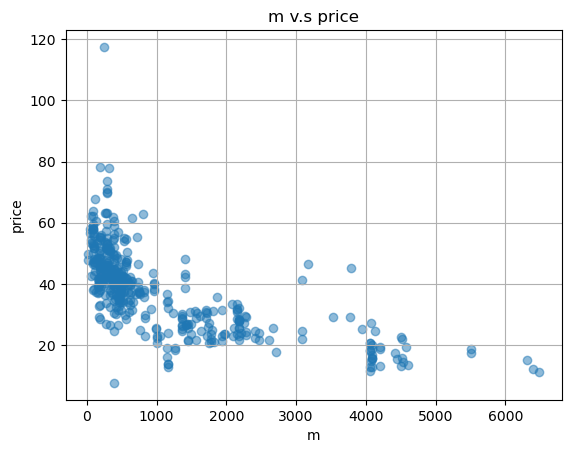

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df['DistanceToMRT'], df['PriceOfUnitArea'] ,alpha=0.5)
plt.xlabel("m")
plt.ylabel('price')
plt.title("m v.s price")
plt.grid(True)
plt.show()

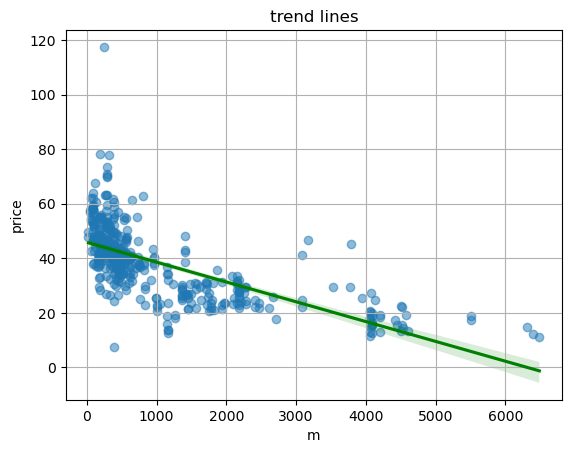

In [24]:
import seaborn as sns

sns.regplot(
    x="DistanceToMRT",
    y="PriceOfUnitArea",
    data=df,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'green'}
)

plt.xlabel('m')
plt.ylabel('price')
plt.title('trend lines')
plt.grid(True)
plt.show()

MRT
中距離    34.716346
近捷運    46.237915
遠距離    23.809091
Name: PriceOfUnitArea, dtype: float64


c:\Users\cizhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cizhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36317 (\N{CJK UNIFIED IDEOGRAPH-8DDD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cizhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38626 (\N{CJK UNIFIED IDEOGRAPH-96E2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cizhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36817 (\N{CJK UNIFIED IDEOGRAPH-8FD1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cizhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25463 (\N{CJK UNIFIED IDEOGRAPH-6377}) missing from font(s) DejaVu San

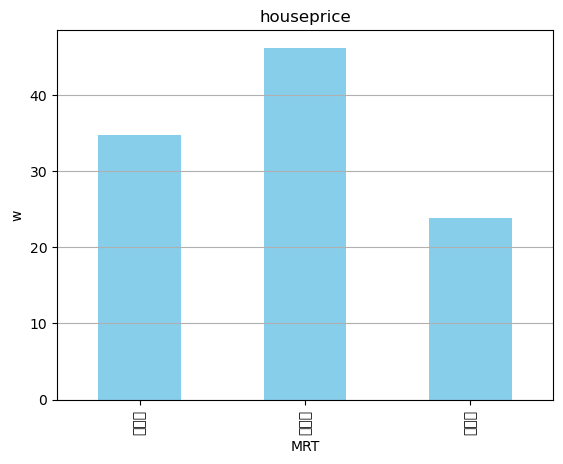

In [25]:
def group_mrt(dist):
    if dist < 500 :
        return '近捷運'
    elif dist < 1500:
        return '中距離'
    else:
        return '遠距離'
df['MRT'] = df['DistanceToMRT'].apply(group_mrt)

grouped = df.groupby('MRT')['PriceOfUnitArea'].mean()
print(grouped)

grouped.plot(kind='bar',color='skyblue')
plt.ylabel("w")
plt.title("houseprice")
plt.grid(axis='y')
plt.show()

hp
med    17.003810
new     4.305505
old    34.711702
Name: HouseAge, dtype: float64


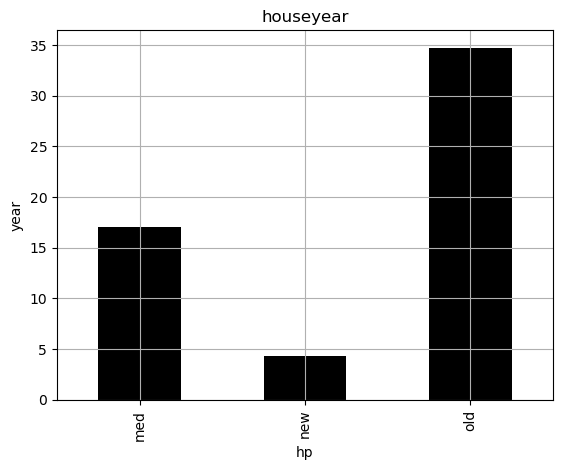

In [27]:
def group_house(year):
    if year<10:
        return 'new'
    elif year < 30:
        return 'med'
    elif year >30:
        return 'old'
df['hp']=df['HouseAge'].apply(group_house)
gro=df.groupby('hp')['HouseAge'].mean()
print(gro)

gro.plot(kind='bar',color='black')
plt.ylabel('year')
plt.title('houseyear')
plt.grid(True)
plt.show()

In [28]:
import statsmodels.api as sm

x = df[['DistanceToMRT', 'HouseAge', 'NumberConvenienceStores']]
y = df['PriceOfUnitArea']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        PriceOfUnitArea   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     161.1
Date:                Tue, 20 May 2025   Prob (F-statistic):           5.44e-69
Time:                        10:18:23   Log-Likelihood:                -1506.5
No. Observations:                 414   AIC:                             3021.
Df Residuals:                     410   BIC:                             3037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     